# Content

- **Introduction to Business Case: DL Engineer at BBC**
- **Dataset EDA**
  - Attribute information
  - Category distribution plot
- **Traditional methods : Why they won't work**
  - MLP Classifiers : No temporal components
- **Introduction to RNNs**
  - Advantages
  - RNNs unravelled over time
  - Types of RNNs
- **RNN Architecture**
  - Parameters
  - Inputs
  - Weight matrices
- **Training a Many to One RNN model**
  - Forward propagation
  - Backpropagation through time
  - Gradient clipping
- **Expanding training methods to other types of RNNS**
  - Multi-output RNNs
  - Bidirectional RNNs
  
- **Code Implementation**
  - Text preprocessing
    - Text cleaning
    - Fixing a sequence length
    - splitting the dataset
  - Text processing
    - OHE labels
    - Tokenization & padding
  - Training an RNN
    - Defining RNN architecture
    - Model training
    - Making predictions
    - Confusion matrix

- **Conclusion**

# RESEARCH PAPERS
1. [A Critical Review of Recurrent Neural Networks
for Sequence Learning](https://arxiv.org/pdf/1506.00019.pdf)
2. [Fundamentals of Recurrent Neural Network (RNN)
and Long Short-Term Memory (LSTM) Network](https://arxiv.org/pdf/1808.03314.pdf)

# How to classify a news headline into a relevant category?

`You are an DL Engineer at BBC.`

**`Problem Statement`:** BBC wants to auto categorize the news into various categories which will also help in recommending the right news articles to it users at a later stage.


`Note:` *BBC - British Broadcasting Corporation*

### Dataset

A sample of 2225 news article and their relavant category.

**Attribute information:**
- filename - name of the file for that news.
- title - the headline of the news
- content - main news content.
- **category** - target variable that describes the type of a news item.


In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import re
import matplotlib.pyplot as plt

In [ ]:
# !gdown 1POmzYEQZgZVqJO3F_cyNcd4QmoNE_mCv

---
# Reading the dataset
---

In [2]:
df = pd.read_csv("../dataset/bbc-news-data.csv", sep="\t")
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [8]:
# Dropping the empty sub-title
print(df.shape)
df = df[((~df.title.isnull()) & (~df.content.isnull()))].reset_index(drop=True)
print(df.shape)

df

(2225, 4)
(2225, 4)


,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


Text(0, 0.5, 'Count')

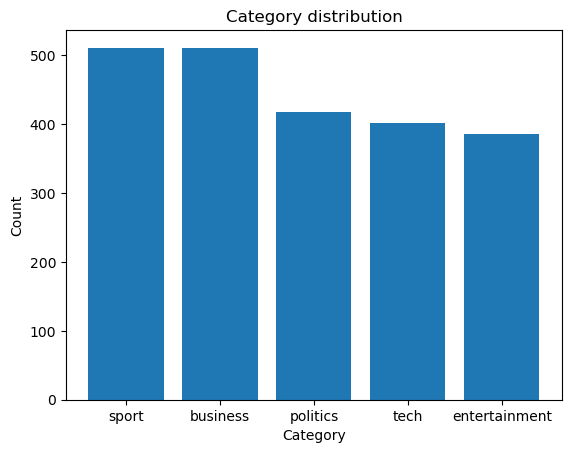

In [9]:
plt.bar(df.category.value_counts().index, df.category.value_counts().values)
plt.title('Category distribution')
plt.xlabel("Category")
plt.ylabel("Count")

Let's take a look at one of the sample example of how the data looks like

In [12]:
ind=1807
print(f'Title: {df.title[ind]}')
print(f'Category: {df.category[ind]}')

Title: Federer joins all-time greats
Category: sport


---
# Why MLP would not perform well for this problem?
---

Before moving to MLP, let's understand what is temporal/Sequential data

<b>Temporal component</b>: Temporal means related to time. As we speak or write we do it in a sequence over time and it may not make sense when we change the order. Such type of data is called sequential/temporal data.

Other examples: Daily Stock price, Video

## What if we use MultiLayer Perceptron?

Let's first build a MultiLayer Perceptron to train a FeedForward NeuralNetwork to classify the given sentence into any of the 5 categories.


For the sake of understanding let's look at one example

<B>Example sentence</B>:
<br>
<B>Title</B>: "Federer joins all time greats"
<br>
<B>Class</B>: "sport"

The words in the example can be thought of as an individual time step in the sequence.

| <font size = 4>t-4</font> | <font size = 4>t-3</font> |....|....| <font size = 4>t</font> |
|---|---------------|----|----|---------------|
| <font size = 4>Federer</font> | <font size = 4>joins</font> | <font size = 4>all</font> | <font size = 4>time</font> | <font size = 4>greats</font> |
| <font size = 4>x<sub>t-4</sub></font> |<font size = 4>x<sub>t-3</sub></font>|....|....|<font size = 4>x<sub>t</sub></font>|


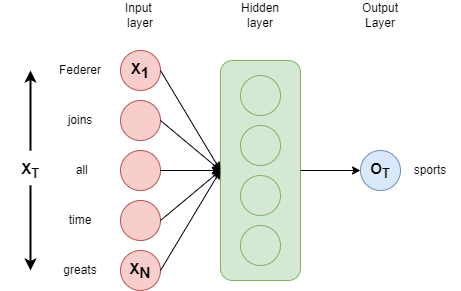

### What is missing in this architecture?

* <b>All inputs at once</b>:
<br>
    A simple Feed Forward NN type of architecure assumes that all the inputs(all words from the example) come from a single time steps t. But in reality we speak/write one word after the other so there is mechanism of word order this architecture.


* <b>Inputs of varying length </b>:
<br>
    A MLP architecuture can handle only a fixed-size input. In the example "Federer joins all time greats" the input neurons required are 5. If we have another input "Nadal won the Australian open this year", this example requires 7 input neurons


### Can we modify this architecture a bit to solve the above said problems?

* <b>Pass each word at each timestep</b>
<br>
    In the modified MLP architecture we will reuse the same set of weights and pass each words at a timestep from <b>t-n</b> to <b>t</b>. By doing this we are able to pass each word sequentially to the model instead of all at once.

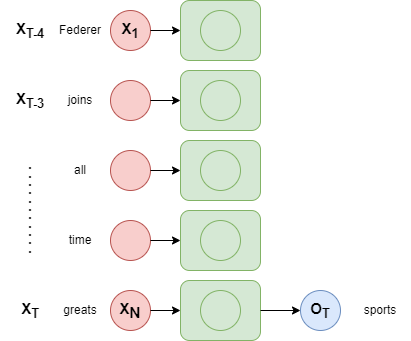


### Is there something still missing? Yes!!!
Language makes sense only when spoken in an order and the current word depends on the previous words spoken/written

Let's look at a simple example where you will have to fill in the last word

$\;\;\;\;\;\;\;\;\;\;\;\;$ <b>Fill the last word</b>

$\;\;\;\;\;\;\;\;\;\;\;\;$ <b>Scenarion 1</b>: ______ ______ ______ ______ <font color= 'green'>______</font>
<br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <b>Scenarion 2</b>: Sachin Tendulkar is a <font color= 'green'>______</font>
<br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <b>Answer</b>: Sachin Tendulkar is a <font color= 'green'> <u>cricketer</u></font>

In Scenario 1, without having access to the previous words it is literally impossible to fill the blank as <b>cricketer</b>. However in scenario 2 it's easy to fill because we know the context of what are the previous words.

* <b>No connection from previous input words</b>
<br>
    As we pass one word at a time step <B>t</B>, the final output "<B>sports</B>" is not only a function of the last word "<B>greats</B>" passed at time <B>t</B>. But it also depends on the other words "<B>Federer joins all time</B>" as well which are passed from time steps <B>t<sub>n-6</sub></B> <B>t<sub>n-1</sub></B>


* <b>Each word is isolated from the other</b>
<br>
    Even after passing data sequentially by reusing the MLP architecture again and again for each time step, each of the input is still isolated and independent from each other
    
    
### What is missing in this modified architecture?
* <b>No Temporal component</b>:
<br>
    The temporal component is missing here. Since the MLP model assumes the entire input from <B>x<sub>1</sub></B> to <B>x<sub>L</sub></B> comes all at once instead of one after the other at each time step



# Let's summarize the problems
* All input passed at once
<br>
* Can't handle varying length inputs
<br>
* No Temporal connections in the modified MLP

# Can we overcome all these?
<font size=4><b>Yes!!! RNN comes for the rescue </b></font>


- What we need is a architecture where the current input at time <B>t</B> is processed along with all the prior inputs from <B>t-n</B> to <B>t-1</B>.

- To achieve this we will introduce a memory(hidden) state <B>h</B>. This memory state will carry the information from the previous time step to the current time step in a recursive manner. So the information is processed together at the current time step.

- Because of this recurrence relation the output is going to be a function of input at the current time step along with the inputs from previous time steps

<br>
<center><font size='4'><b>O<sub>t</sub> = f(X<sub>t</sub>, h<sub>t-1</sub>)</b></font></center>

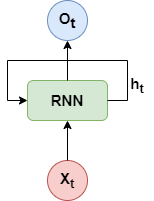

---
# What are RNNs?
---
- RNNs are special type of Neural Networks architecture that has a memory state which can process the current input along with the information from the previous time step

### When to use them?
- When were are dealing with sequential data. In other terms when we have a temporal component associated to it and the data makes sense only when followed a sequence.

$\;\;\;\;\;\;$<b>Sequence</b>: Federer joins all time greats
<br>
$\;\;\;\;\;\;$<b>No sequence</b>: all Federer greats time joins

Example Data: Time series data(stock price, Weather data), Genomic data, Language texts.

A noteable difference of RNN is how we use the hiddent state (<b>h<sub>t-1</sub></b>) from the previous time step input(<b>X<sub>t-1</sub></b>) as one of the input for the current time step(<b>t</b>) along with the input (<b>X<sub>t</sub></b>)

### Advantages
* <b>All inputs at once</b>:
<br>
    A simple Feed Forward NN type of architecure assumes that all the inputs(all words from the example) come from a single time steps <b>t</b>. But in reality we speak/write one word after the other so there is mechanism of word order in this architecture.


* <b>Inputs of varying length </b>:
<br>
    A simple MLP architecuture can handle only a fixed-size input. But RNNs can accomomdate variable size input since we are reusing the same RNN unit again and again. In the example "Federer joins all time greats" which is 5 word long can also be passed to the same RNN unit with another example "Nadal won the Australian open this year" which is 7 words long.


* <b>Weight sharing</b>:
<br>
RNN is a single unit cells used at every time step. Due to the nature of reusability the weights are shared across all the inputs. This also helps in reduced computation compared to a MLP architecture.



# How RNN unravelled over-time?

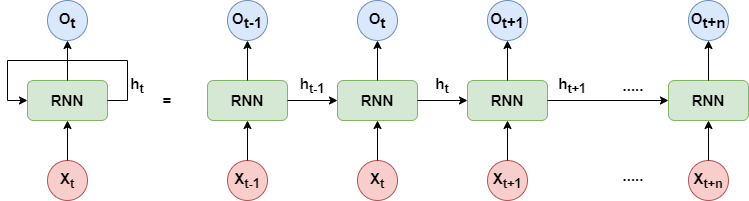

# What are the different types of RNN?

## Types of input & output

There are couple of varaints of RNN based on the number of inputs and the outputs.

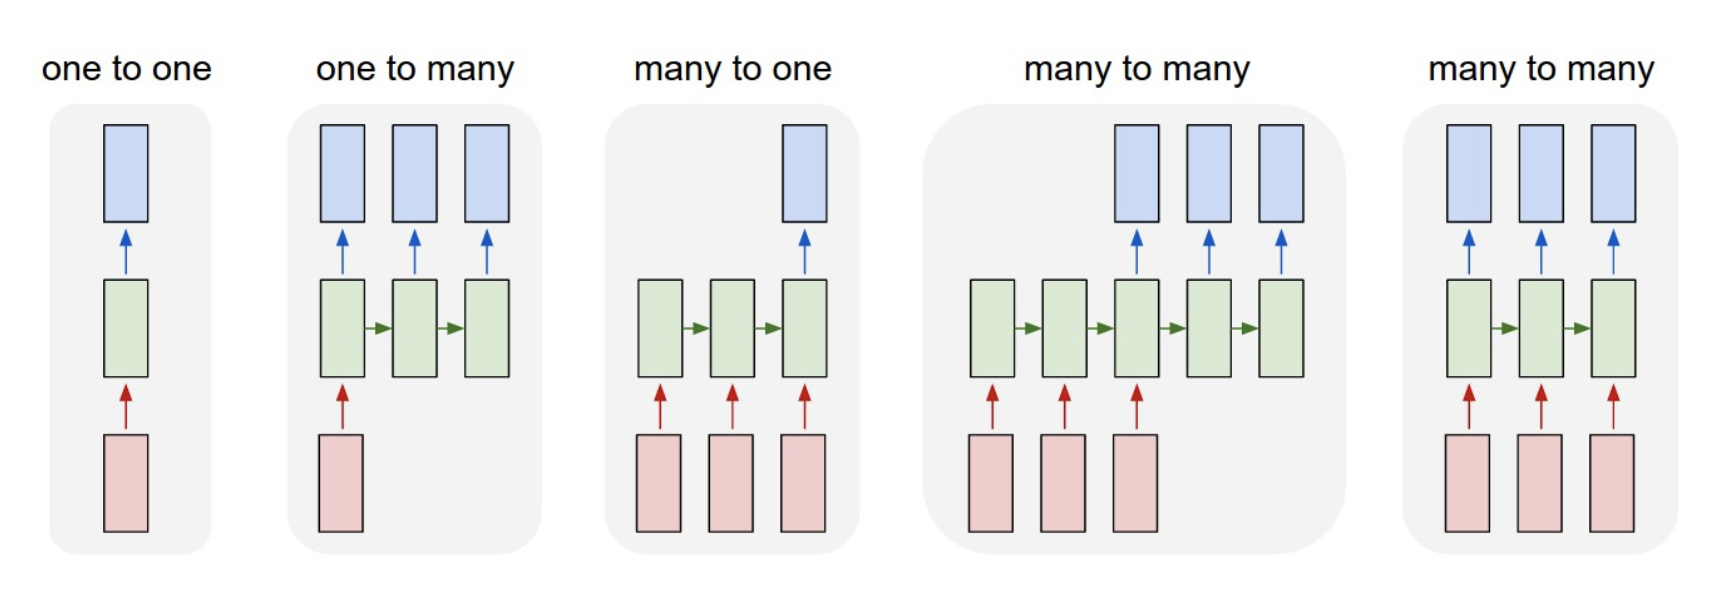

<B>One to One</B>: T<sub>x</sub>=1, T<sub>y</sub>=1
<br>
<u>Example</u>: Normal Feedforward Neural Network
<br>
<br>
<B>One to Many</B>: T<sub>x</sub>=1, T<sub>y</sub>>1
<br>
<u>Example</u>: Image captioning
<br>
Image captioning is a task where a image is passed to the model and it outputs the phrase about the objects in the image. if a image has a dog playing with a ball, the model should predict as close as possible "A dog is playing with a ball".
<br>
<br>
<B>Many to One</B>: T<sub>x</sub>>1, T<sub>y</sub>=1
<br>
<u>Example</u>: Sentiment classification
<br>
Sentiment classification is a task of passing a phrase or sentence about a movie review to the model and output if the sentiment is positive or negative.
<br>
<br>
<B>Many to Many</B>: T<sub>x</sub>>1, T<sub>y</sub> >1, T<sub>x</sub>!=T<sub>y</sub>
<br>
<u>Example</u>: Language translation
<br>
Language translation is the task of inputting text to a model in one language and predict the same text in another langauge of interest(Google translator).
<br>
<br>
<B>Many to Many</B>: T<sub>x</sub>>1, T<sub>y</sub> >1, T<sub>x</sub>=T<sub>y</sub>
<br>
<u>Example</u>: Named Entity Recognition
<br>
Name entity recognition is a task of automatically identifying keywords in the text. The keywords could be the name of the person, name of a company, city, phone number, email etc from the given text.

---
# What are different components of the RNN unit?
---

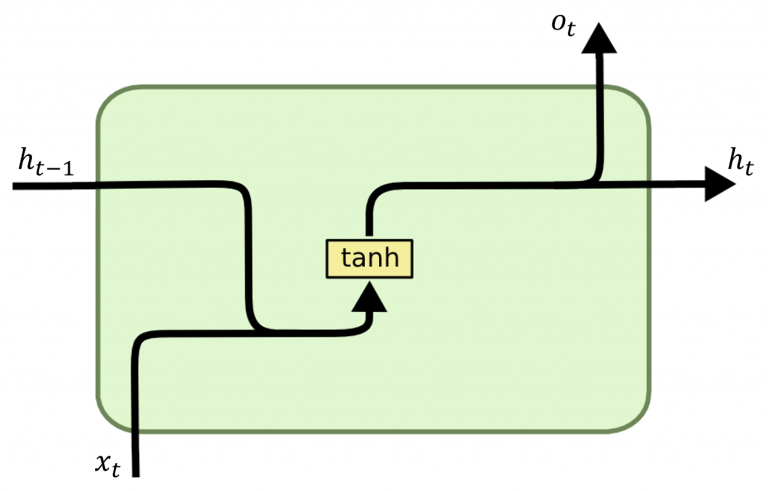

### <u><B>X<sub>t</sub></B></u>:
X<sub>t</sub> is the input at time step t. In our example above "<B>Federer joins all time greats</B>" each word is passed at a time.
<br>
<u>Note</u>: When we say we pass each word to the network we first convert each words to a vector representation of defined length and then pass it to the RNN unit.

### <u><B>h<sub>t-1</sub></B></u>:  
Hidden state from the previous time step which is vector representation of the information from previous time steps
<br>
<u>Note</u>: When we are passing the first input the hidden states are initialized to all zeros

### <u><B>tanh</B></u>:
The input from the current time step <b>t</b> and the hidden state from the previous time step <b>t-1</b> are combined(addition) together and a non-linear activation function is applied. In case of Vanilla RNN it is the <b>tanh</b>

### <u><B>h<sub>t</sub></B></u>:
Hiddent state from the current time step <b>t</b>. This state is updated at everytime step which is a function of the input at current time step <b>t</b> and the previous hidden state <b>h<sub>t-1</sub></b>

### <u><B>O<sub>t</sub></B></u>:
O<sub>t</sub> is the output of RNN. It can be single or multi output based on the use case. Also based on the use cases we can get output at everytime step or only at the last time step.


# But do we pass the words as is to the RNN cell?
- <font size='4'> No we don't, We all know machines can't understand text but only numbers
</font>
    
<font size='4'>Then, How the do we convert the text to numbers? Let's understand with an example.
</font>


There are 2 ways this can be done

1. Using pre-trained word embeddings like Word2Vec, Glove, ELMO etc.
2. Learning the embeddings while training the LSTM model

<b>Example sentence 1:</b> "the cat sat on the same wall the rat sat"
<br>
<b>Example sentence 1:</b> "the cat likes milk"
<br>

<b>Method 1</b>

* For the above 2 example sentences we convert each word to vectors using the pretrained embedding and then pass them to the RNN cell.
* We can set the trainable method to <b>False</b> if we don't want to fine-tine these embeddings while training.
* We can choose the dimension of the word embedding for these pretained word embedding models.

<b>Method 2</b>

* First we create a vocabulary of all unique words in the dataset
<br>
* For the above sentences the vocabulary size is 9 and we assign index to each word.
<br>
$\;\;\;\;\;\;${cat:0, likes:1, milk:2, on:3, rat:4, same:5, sat:6, the:7, wall:8}


* There is a embedding layer of said dimension before passing it to the RNN cell
* The word embeddings are assigned to each word indexes i.e 0 to 8
* The word embeddings are randomly initialized in the embedding layer for the given dimension and is learnt during the training process by setting <b>trainable=True</b>

$\;\;\;\;\;\;$ Let's say we choose embedding dimension as 3 then embedding vector for each word would look like
<br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ cat(0) = [0.2, 0.84, 0.4]
<br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ likes(1) = [0.7, 0.34, 0.4]
<br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ milk(2) = [0.6, 0.5, 0.23]
<br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ on(3) = [0.1, 0.2, 0.04]
<br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ rat(4) = [0.94, 0.8, 0.9]
<br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ same(5) = [0.45, 0.23, 0.28]
<br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ sat(6) = [0.78 0.9, 0.5]
<br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ the(7) = [0.25, 0.16, 0.2]
<br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ wall(8) = [0.11, 0.93, 0.01]

$\;\;\;\;\;\;$ <b>Note:</b> The embedding dimensions could be of any size. The most commonly used dimensions are 100 to 300.


# What is being learnt?

* Similar to the MLP architecture we have weight matrices in RNN which are learnt during the training.
    * <b>W<sub>hx</sub></b>: The weight matrix at the input
    * <b>W<sub>hh</sub></b>: The weight matrix at the hidden state
    * <b>W<sub>hy</sub></b>: The weight matrix at the output
* Note: The same set of weights will be applied at each time steps during the training.


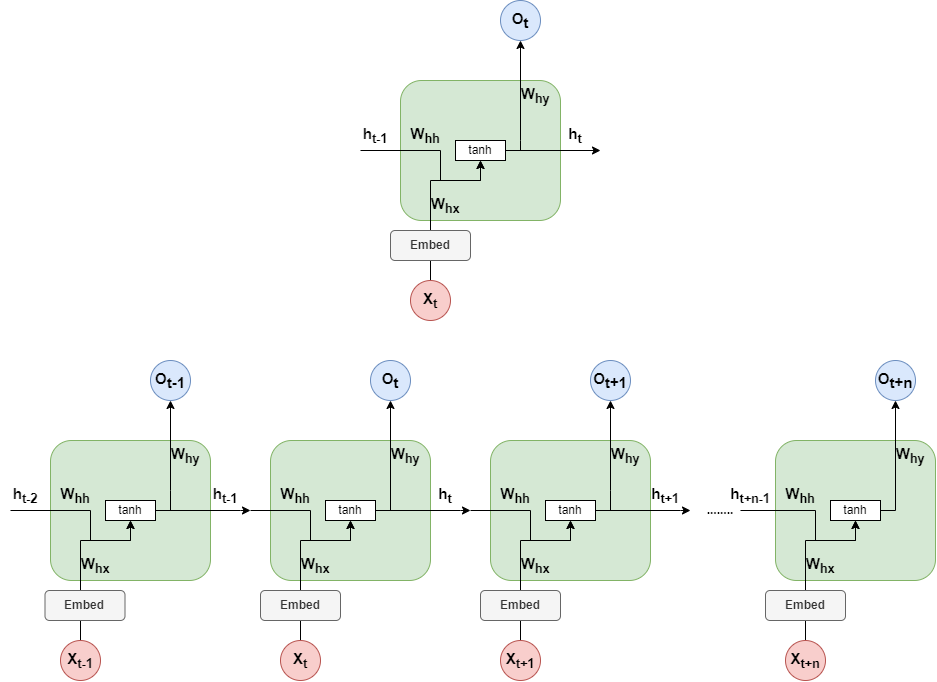

---
# Now, Lets train an RNN
---

# How Forward propagation is different in RNN?

Let's look at how the model is trained during the Forward propagation with an example

For the ease of notations, Let's call the following Weight matrices as

<b>W<sub>hx</sub> = U </b>
<br>
<b>W<sub>hy</sub> = V </b>
<br>
<b>W<sub>hh</sub> = W </b>


<b>Z<sub>yt</sub>, <b>Z<sub>ht</sub> = Intermediate results</b>
<br>
<b>σ = Activation function</b>
<br>
<b>Y = Actual </b>
<br>
<b>L = Loss function</b>

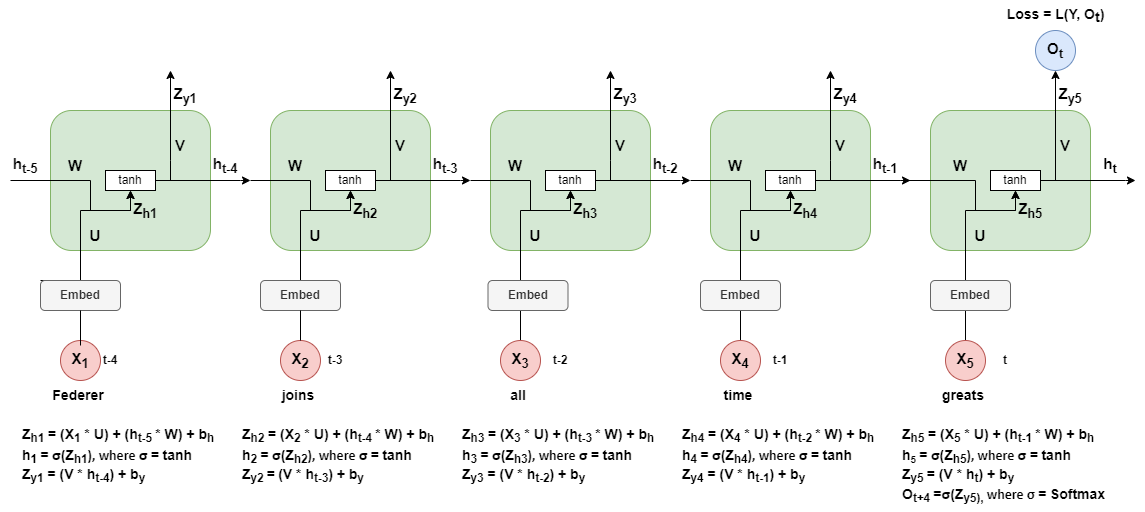

### Steps in Forward Propagation

<font size = '4'>
For each word in the input:
<br>
$\;\;\;\;\;$ 1. Multiply previous hidden state with weight matrix W
<br>
$\;\;\;\;\;$ 2. Multiply input word with weight matrix U
<br>
$\;\;\;\;\;$ 3. Add 1. and 2. and bias
<br>
$\;\;\;\;\;$ 4. Apply the Non-Linear Activation Function (tanh)
<br>
$\;\;\;\;\;\;\;\;\;\;$ i. A copy of 4. is mutiplied with weight matrix V
<br>
$\;\;\;\;\;\;\;\;\;\;$ ii. Add bias to 4i. and apply the non-Linear Activation function(based on usecase)
<br>
$\;\;\;\;\;\;\;\;\;\;$ ii. Calculate Loss (based on usecase)
<br>
$\;\;\;\;\;$ 5. A copy of 4. is passed as hidden state to the next time step
    

The above steps can be mathematically generalized as
<br>    
<font size = '4'>
$\;\;\;\;\;\;$ Z<sub>ht</sub> = U*X<sub>t</sub> + W*h<sub>t-1</sub> + b<sub>h</sub>
<br>
$\;\;\;\;\;\;$ h<sub>t</sub> = σ<sub>h</sub>(Z<sub>ht</sub>)
<br>
$\;\;\;\;\;\;$ Z<sub>yt</sub> = V*h<sub>t</sub> + b<sub>y</sub>
<br>
$\;\;\;\;\;\;$ O<sub>t</sub> = σ<sub>y</sub>(Z<sub>yt</sub>)
<br>
$\;\;\;\;\;\;$ L = L(O<sub>t</sub>, Y<sub>t</sub>)

</font>

# How Backward propagation is different in RNN?

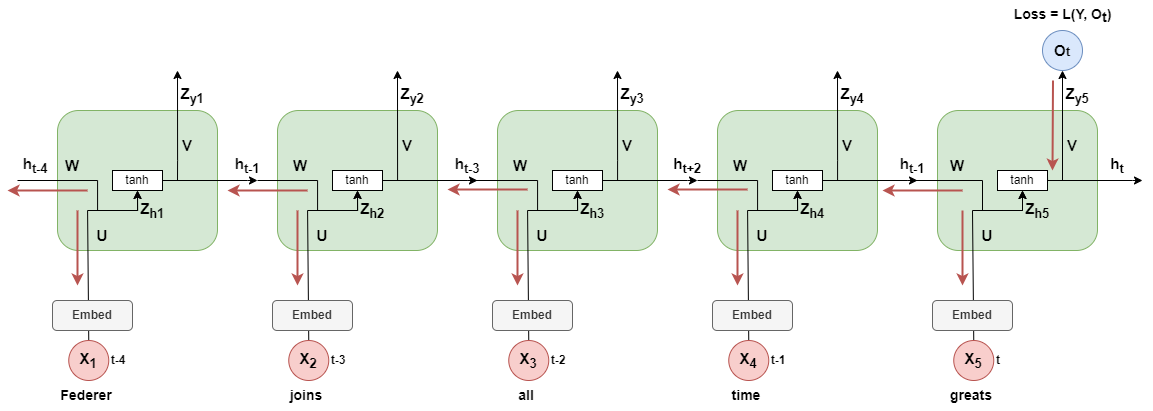

### Usual steps involved in updating parameter weights:

* Calculate the gradients of the loss with respect to the parameters
* Multiply it with the Learning rate
* Update the new weights

<font size='4.5'>

$$
V = V - \alpha \frac{\partial \mathbf{L}}{\partial \mathbf{V}}
$$
    
$$
W = W - \alpha \frac {\partial \mathbf{L}}{\partial \mathbf{W}}
$$

    
$$
U = U - \alpha \frac{\partial \mathbf{L}}{\partial \mathbf{U}}
$$

$$\alpha - Learning \ rate $$

</font>    

### How is Back Propagation Through Time(BPPT) different from the usual backpropagation?
</font>

* <b>Same weight matrices are used</b>
<br>
    In MLP based architecture the weights are not repeated at differenent layers whereas in RNN the same weight matrices are used at each time step


* <b>The gradients are added at each step to make an update</b>
<br>
    Since the same weights are used at each time step, the gradients are summed together at each time step to make one update to the weight matrices

#### Simpler representation to understand back propagation through time

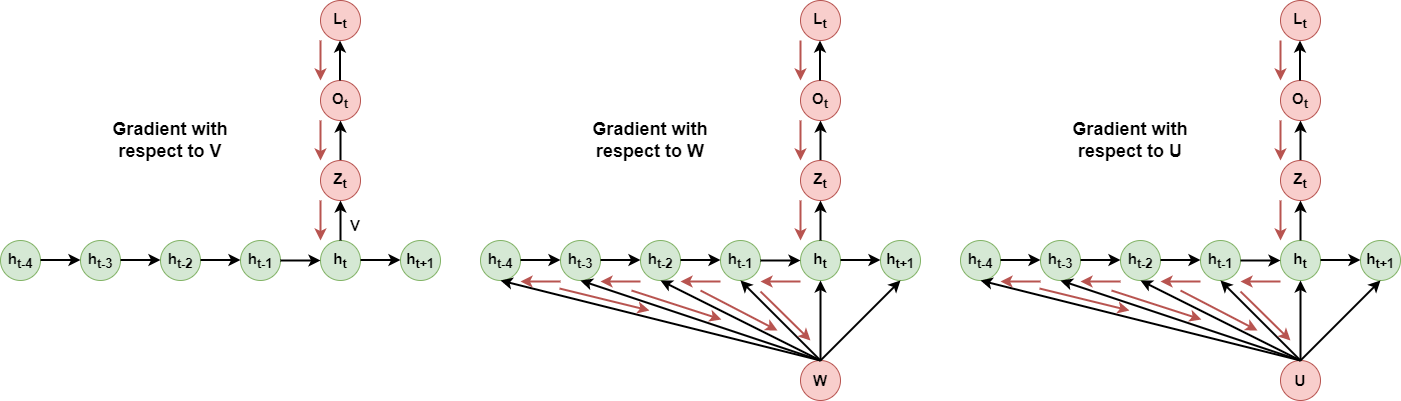

# What is Loss function?

#### What is a Loss function and why we need?
* The Loss function helps to determine how good or bad the model is performing comparing it with the actual output.
* These are many loss functions based on the problem we are solving and the most commonly used loss metrics are
    <br>
    * <b>Regression</b>: RMSE, MSE, SSE
    <br>
    * <b>Binary classification</b>: Binary cross-entrophy loss
    <br>
    * <b>Multiclass classification</b>: Multiclass cross-entrophy loss

#### What Loss function should we use?
Since we are solving a Multiclass classification problem, Multiclass cross-entrophy loss is the right metric to use
<br>   
<font size = '4'>
$
L_t = -Y\log(O_t)
$



# How optimization is done with respect to V?

<br>
$\;\;\;\;$* As a first step we need to calculate the gradients of the loss <b>L<sub>t</sub></b> at time <b>t</b> with respect to the weight matrix <b>V</b>
    <br>
$\;\;\;\;$* As we go through the path we see that <b>O<sub>t</sub></b> depends on <b>Z<sub>t</sub></b> to reach <b>V</b> and will make use of the chain rule to calculate the gradients.
<br>
<br>    
    
<font size='4.5'>

$
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{V}} =
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{O_t}} * \frac{\partial  \mathbf{O_t}}{\partial \mathbf{Z_t}} * \frac{\partial  \mathbf{Z_t}}{\partial \mathbf{V}}
$
    
#### Update the weight matrix V
    
$
V = V - \alpha \frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{V}}
$
   
</font>

# How optimization is done with respect to W?

<br>
    As a first step we need to calculate the gradients of the loss <b>L<sub>t</sub></b> at time <b>t</b> with respect to the weight matrix <b>W</b>
    <br>
$\;\;\;\;$* As we go through the path we see that <b>h<sub>t</sub></b> depends on <b>W</b> and <b>h<sub>t-1</sub></b> directly. But <b>h<sub>t-1</sub></b> indirectly depends on <b>W</b>.
    <br>
$\;\;\;\;$* When we look at <b>h<sub>t-1</sub></b>, it directly depends on <b>W</b> and <b>h<sub>t-2</sub></b>. But <b>h<sub>t-2</sub></b> indirectly depends on <b>W</b>.
    <br>
$\;\;\;\;$* This keeps chaining due to the dependencies on time and we can calculate the gradients with respect to each time step  using the chain rule in calculus
    <br>
$\;\;\;\;$* A very important thing to note here is the weight matrix <b>W</b> is common across all the time steps
    
<br>    
<font size='4'>

$
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{W}} =
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{O_t}} * \frac{\partial  \mathbf{O_t}}{\partial \mathbf{Z_t}} * \frac{\partial  \mathbf{Z_t}}{\partial \mathbf{h_t}} * \frac{\partial  \mathbf{h_t}}{\partial \mathbf{W}}
$
</font>
    
<font size='4'>
    
#### Gradients of loss with respect to W at different t
<br>
$
\;\;\;\;\;\;\;\;
\color{magenta}{
\frac{\partial  \mathbf{h_{t}}}{\partial \mathbf{W}} =
\frac{\partial  \mathbf{h_{t}}}{\partial \mathbf{W}} + \frac{\partial  \mathbf{h_t}}{\partial \mathbf{h_{t-1}}} * \frac{\partial  \mathbf{h_{t-1}}}{\partial \mathbf{W}}
}
\\
\;\;\;\;\;\;\;\;
\color{red}{
\frac{\partial  \mathbf{h_{t-1}}}{\partial \mathbf{W}} =
\frac{\partial  \mathbf{h_{t-1}}}{\partial \mathbf{W}} + \frac{\partial  \mathbf{h_{t-1}}}{\partial \mathbf{h_{t-2}}} * \frac{\partial  \mathbf{h_{t-2}}}{\partial \mathbf{W}}
}
\\
\;\;\;\;\;\;\;\;
\color{green}{
\frac{\partial  \mathbf{h_{t-2}}}{\partial \mathbf{W}} =
\frac{\partial  \mathbf{h_{t-2}}}{\partial \mathbf{W}} + \frac{\partial  \mathbf{h_{t-2}}}{\partial \mathbf{h_{t-3}}} * \frac{\partial  \mathbf{h_{t-3}}}{\partial \mathbf{W}}
}
\\\;\;\;\;\;\;\;\;
\color{orange}{
\frac{\partial  \mathbf{h_{t-3}}}{\partial \mathbf{W}} =
\frac{\partial  \mathbf{h_{t-3}}}{\partial \mathbf{W}} + \frac{\partial  \mathbf{h_{t-3}}}{\partial \mathbf{h_{t-4}}} * \frac{\partial  \mathbf{h_{t-4}}}{\partial \mathbf{W}}
}
\\
\;\;\;\;\;\;\;\;
\color{yellow}{
\frac{\partial  \mathbf{h_{t-4}}}{\partial \mathbf{W}} =
\frac{\partial  \mathbf{h_{t-4}}}{\partial \mathbf{W}} + \frac{\partial  \mathbf{h_{t-4}}}{\partial \mathbf{h_{t-5}}} * \frac{\partial  \mathbf{h_{t-5}}}{\partial \mathbf{W}}
}
$

</font>


<font size='4'>

#### Bringing all together
<br>
$
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{W}} =
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{O_t}} * \frac{\partial  \mathbf{O_t}}{\partial \mathbf{Z_t}} * \frac{\partial  \mathbf{Z_t}}{\partial \mathbf{h_t}}
\color{magenta}{
(\frac{\partial  \mathbf{h_{t}}}{\partial \mathbf{W}} + \frac{\partial  \mathbf{h_t}}{\partial \mathbf{h_{t-1}}} *
(
\color{red}{
\frac{\partial  \mathbf{h_{t-1}}}{\partial \mathbf{W}} + \frac{\partial  \mathbf{h_{t-1}}}{\partial \mathbf{h_{t-2}}} *
(
\color{green}{
\frac{\partial  \mathbf{h_{t-2}}}{\partial \mathbf{W}} + \frac{\partial  \mathbf{h_{t-2}}}{\partial \mathbf{h_{t-3}}} *
(
\color{orange}{
\frac{\partial  \mathbf{h_{t-3}}}{\partial \mathbf{W}} + \frac{\partial  \mathbf{h_{t-3}}}{\partial \mathbf{h_{t-4}}} *  
(
\color{yellow}{
\frac{\partial  \mathbf{h_{t-4}}}{\partial \mathbf{W}} + \frac{\partial  \mathbf{h_{t-4}}}{\partial \mathbf{h_{t-5}}} *  
\frac{\partial  \mathbf{h_{t-5}}}{\partial \mathbf{W}}
}
)
}
)
}
)
})
}
)
$
</font>

<font size='4'>

#### Expanding it
<br>
$
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{W}} =
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{O_{t}}}
\frac{\partial  \mathbf{O_{t}}}{\partial \mathbf{Z_{t}}}
\frac{\partial  \mathbf{Z_{t}}}{\partial \mathbf{h_{t}}}
\color{magenta}{\frac{\partial  \mathbf{h_{t}}}{\partial \mathbf{W}}} +
\\
\;\;\;\;\;\;\;\; \frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{O_{t}}}
\frac{\partial  \mathbf{O_{t}}}{\partial \mathbf{Z_{t}}}
\frac{\partial  \mathbf{Z_{t}}}{\partial \mathbf{h_{t}}}
\color{magenta}{\frac{\partial  \mathbf{h_{t}}}{\partial \mathbf{h_{t-1}}}}
\color{red}{\frac{\partial  \mathbf{h_{t-1}}}{\partial \mathbf{W}}} +
\\
\;\;\;\;\;\;\;\; \frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{O_{t}}}
\frac{\partial  \mathbf{O_{t}}}{\partial \mathbf{Z_{t}}}
\frac{\partial  \mathbf{Z_{t}}}{\partial \mathbf{h_{t}}}
\color{magenta}{\frac{\partial  \mathbf{h_{t}}}{\partial \mathbf{h_{t-1}}}}
\color{red}{\frac{\partial  \mathbf{h_{t-1}}}{\partial \mathbf{h_{t-2}}}}
\color{green}{\frac{\partial  \mathbf{h_{t-2}}}{\partial \mathbf{W}}} +
\\
\;\;\;\;\;\;\;\; \frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{O_{t}}}
\frac{\partial  \mathbf{O_{t}}}{\partial \mathbf{Z_{t}}}
\frac{\partial  \mathbf{Z_{t}}}{\partial \mathbf{h_{t}}}
\color{magenta}{\frac{\partial  \mathbf{h_{t}}}{\partial \mathbf{h_{t-1}}}}
\color{red}{\frac{\partial  \mathbf{h_{t-1}}}{\partial \mathbf{h_{t-2}}}}
\color{green}{\frac{\partial  \mathbf{h_{t-2}}}{\partial \mathbf{h_{t-3}}}}
\color{orange}{\frac{\partial  \mathbf{h_{t-3}}}{\partial \mathbf{W}}} +
\\
\;\;\;\;\;\;\;\; \frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{O_{t}}}
\frac{\partial  \mathbf{O_{t}}}{\partial \mathbf{Z_{t}}}
\frac{\partial  \mathbf{Z_{t}}}{\partial \mathbf{h_{t}}}
\color{magenta}{\frac{\partial  \mathbf{h_{t}}}{\partial \mathbf{h_{t-1}}}}
\color{red}{\frac{\partial  \mathbf{h_{t-1}}}{\partial \mathbf{h_{t-2}}}}
\color{green}{\frac{\partial  \mathbf{h_{t-2}}}{\partial \mathbf{h_{t-3}}}}
\color{orange}{\frac{\partial  \mathbf{h_{t-3}}}{\partial \mathbf{h_{t-4}}}}
\color{yellow}{\frac{\partial  \mathbf{h_{t-4}}}{\partial \mathbf{W}}} +
\\
\;\;\;\;\;\;\;\; \frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{O_{t}}}
\frac{\partial  \mathbf{O_{t}}}{\partial \mathbf{Z_{t}}}
\frac{\partial  \mathbf{Z_{t}}}{\partial \mathbf{h_{t}}}
\color{magenta}{\frac{\partial  \mathbf{h_{t}}}{\partial \mathbf{h_{t-1}}}}
\color{red}{\frac{\partial  \mathbf{h_{t-1}}}{\partial \mathbf{h_{t-2}}}}
\color{green}{\frac{\partial  \mathbf{h_{t-2}}}{\partial \mathbf{h_{t-3}}}}
\color{orange}{\frac{\partial  \mathbf{h_{t-3}}}{\partial \mathbf{h_{t-4}}}}
\color{yellow}{\frac{\partial  \mathbf{h_{t-4}}}{\partial \mathbf{h_{t-5}}}}
\color{yellow}{\frac{\partial  \mathbf{h_{t-5}}}{\partial \mathbf{W}}}
$
    
</font>


<font size='4'>
    
#### Let's generalize this to a single formula

$
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{W}} =
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{O_{t}}}
\frac{\partial  \mathbf{O_{t}}}{\partial \mathbf{Z_{t}}}
\frac{\partial  \mathbf{Z_{t}}}{\partial \mathbf{h_{t}}}
\sum\limits_{r=1}^t {\frac{\partial  \mathbf{h_{t}}}{\partial \mathbf{h_r}}} {\frac{\partial  \mathbf{h_r}}{\partial \mathbf{W}}}
$

#### Update the weight matrix W
$
W = W - \alpha \frac {\partial \mathbf{L_t}}{\partial \mathbf{W}}
$

</font>


<font size='4'>
    


# How optimization is done with respect to U?

Taking the derivative of <b>U</b> is similar to how we calcualted the gradients with respect to <b>W</b>. It also requires taking sequential derivatives with respect to <b>h<sub>t</sub></b>. So we can rewrite the same formula we derived and replace <b>W</b> with <b>U</b>

<font size='4'>
<br>
$
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{U}} =
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{O_{t}}}
\frac{\partial  \mathbf{O_{t}}}{\partial \mathbf{Z_{t}}}
\frac{\partial  \mathbf{Z_{t}}}{\partial \mathbf{h_{t}}}
\sum\limits_{r=1}^t {\frac{\partial  \mathbf{h_{t}}}{\partial \mathbf{h_r}}} {\frac{\partial  \mathbf{h_r}}{\partial \mathbf{U}}}
$
    
#### Update the weight matrix U
$
U = U - \alpha \frac{\partial \mathbf{L_t}}{\partial \mathbf{U}}
$



## How Gradient clipping works?

Gradient clipping as the name suggest we clip the gradients if it goes beyond a threshold.
It is most widely used for preventing exploding gradients but can help in vanishing gradients too. There are two methods of clipping.

<b>Clip by value:</b>
<br>
if $||g||$ >= upper threshold, then g = upper threshold
<br>
if $||g||$ <= lower threshold, then g = lower threshold

<b>Clip by norm:</b>
<br>
if $||g||$ >= upper threshold, then g = upper threshold * $ \frac{g}{|| g ||}$
<br>
if $||g||$ <= lower threshold, then g = lower threshold * $ \frac{g}{||g||}$

where
* g is the gradient with respect to the parameters
* $||g||$ is the norm of gradient g
* Gradient norm = sqrt$(\sum (\frac{\partial \mathbf{loss}}{\partial \mathbf{parameter}})^2) $
*The gradient norm is a measure of the magnitude of the gradient vector
* upper, lower thresholds are hyperparameters

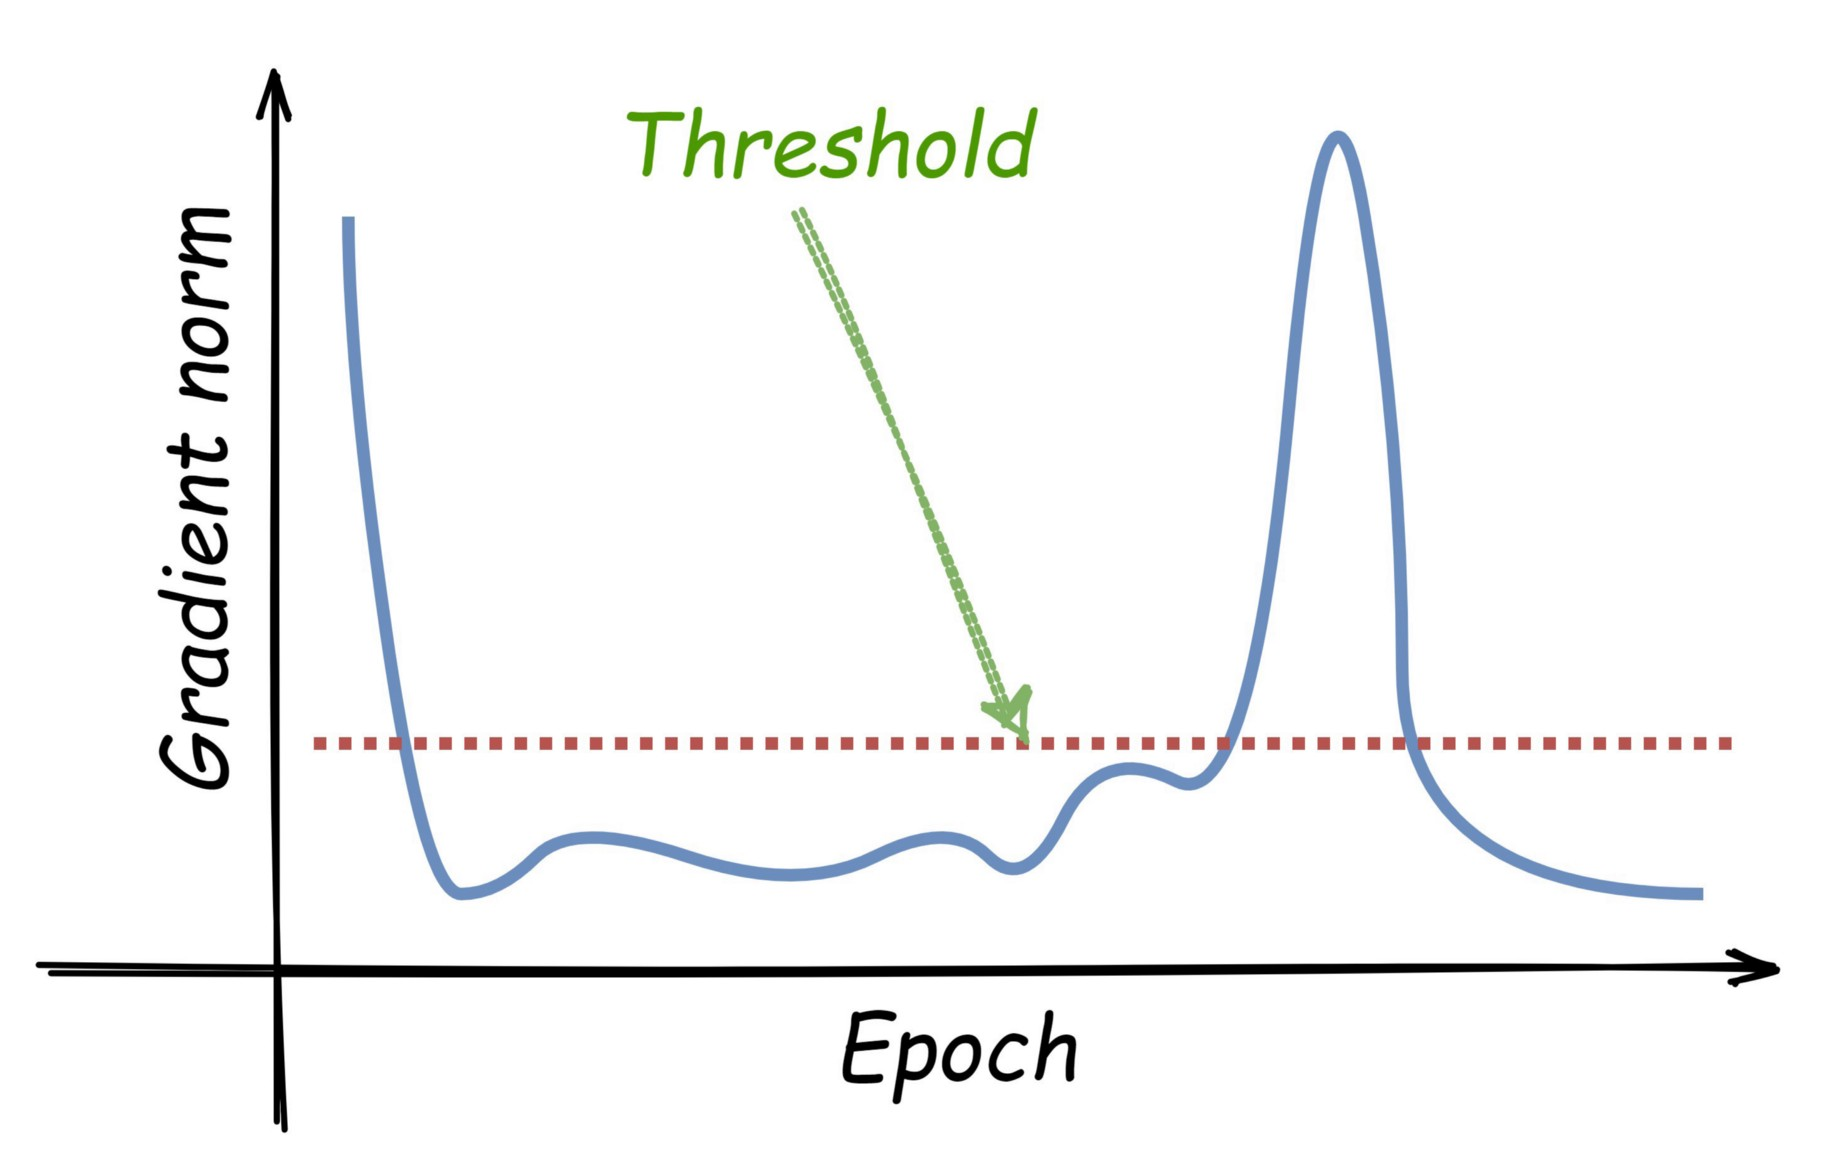

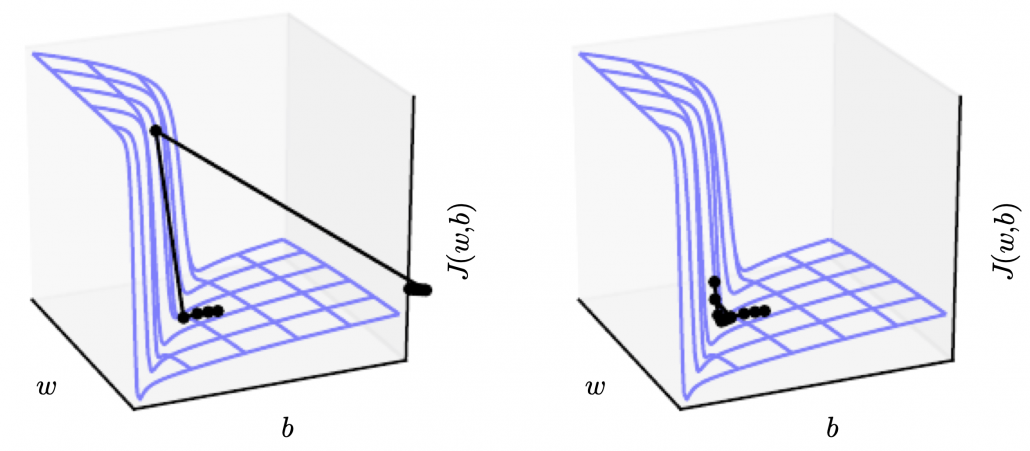

### Weight initialization

* Initializing the weights also play a very important role due to which the Vanishing and the exploding gradients arise
* Initializing the weights with Xavier intialization or He initialization forces the varaince of the weights to be smaller.
* This can help in mitigating the problem of Vanishing and Exploding gradients.

There are 4 ways of weight initialization

<b>Normal Xavier initilization:</b> Initialize the weights by drawing from a normal distribution with
<br>
<font size='3'> $ Mean = 0,  SD = \sqrt {{\frac {2} {(fan_{in} + fan_{out})}} }$</font>

<b>Uniform Xavier initilization:</b> Initialize the weights by drawing from a uniform distribution
<br>
<font size='3'> $between [-w,  w], w = \sqrt {{\frac {6} {(fan_{in} + fan_{out})}} }$</font>

<b>Normal He initilization:</b> Initialize the weights by drawing from a normal distribution
<br>
<font size='3'>$Mean = 0,  SD = \sqrt {{\frac {2} {(fan_{in})}} }$</font>

<b>Uniform He initilization:</b> Initialize the weights by drawing from a uniform distribution
<br>
<font size='3'> $between [-w,  w], w = \sqrt {{\frac {6} {(fan_{in})}} }$</font>


Note: <font size='3'>$fan_{in}, fan_{out}$</font> mean the number of neurons coming in and going out respectively.

# What if we had a multi-output problem? MultiLoss

In the example we saw above, there was only one output because it was a many to one type of RNN.

Incase of many to many or one to many we will have more than one output at each time t.

So we will have to add the losses at each timesteps to get the overall loss and proceed with the BPPT just as explaine above

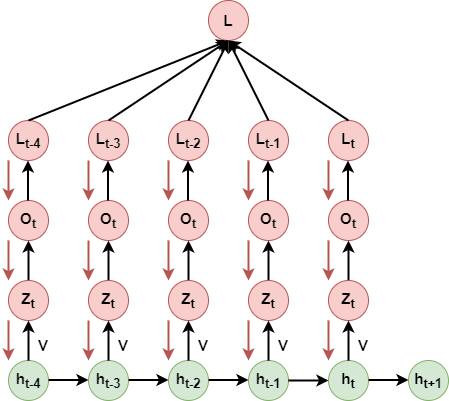

<font size = '5'>
$
L = \sum\limits_{r=1}^t {L_r}
$

---
# Can we use information from the future as well?
---
Yes we can, and it's called <font size='5'><b>Bidirectional RNN</b></font>

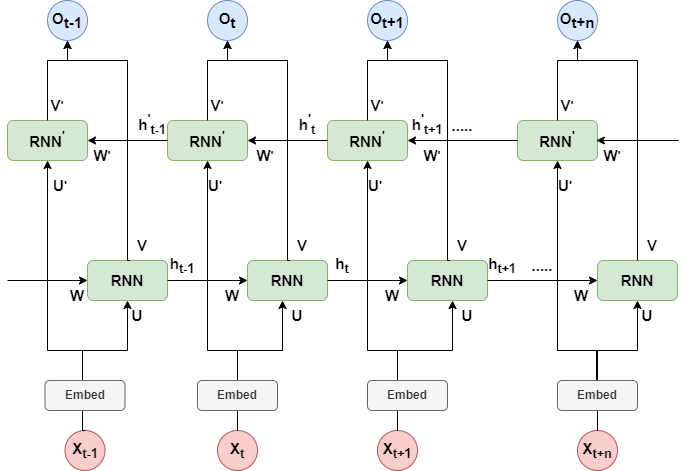

$\;\;\;\;\;\;\;\;\;\;\;\;$ <b>Scenarion 1</b>: Sachin Tendular was <font color= 'red'><u>_____</u></font> ____ ____ ____
<br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <b>Scenarion 2</b>: Sachin Tendular was _____ of Rajya Sabha
<br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <b>Answer</b>: Sachin Tendular was <font color= 'green'><u>MP</u></font> of Rajya Sabha
<br>

In the scenario 2, it's easier to predict the word "MP" if we had access to input from both the left and the right of the current word instead of only the words from the left.

Difference between UniDirectional and BiDirectional RNN


|| <font size='4'>UniDirectional RNN | <font size='4'>Bidirectional RNN|
|---|---------------|----|
|<font size='2'><b>Information flow</b>|<font size='2'> Left to Right|<font size='2'> Left to Right & Right to Left|
|<font size='2'><b>Output depends</b>|<font size='3'> h<sub>t-1</sub>, X<sub>t</sub> | <font size='3'> h<sub>t-1</sub>, X<sub>t</sub>, h<sub>t+1</sub> |
|<font size='2'><b>Weights</b>|<font size='3'> W, U, V | <font size='3'> W, U, V, W', U', V'|

---
# Code Implementation
---

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, Input, InputLayer, RNN, SimpleRNN, LSTM, GRU, TimeDistributed
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

import string

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/debnsuma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Text cleaning

In [14]:
def data_cleaning(text):

    # Lower the words in the sentence
    cleaned = text.lower()

    # Replace the full stop with a full stop and space
    cleaned = cleaned.replace(".", ". ")

    # Remove the stop words : optional pre-processing step
    tokens = [word for word in cleaned.split() if not word in stop_words]

    # Remove the punctuations
    tokens = [tok.translate(str.maketrans(' ', ' ', string.punctuation)) for tok in tokens]

    # Joining the tokens back to form the sentence
    cleaned = " ".join(tokens)

    # Remove any extra spaces
    cleaned = cleaned.strip()

    return cleaned


In [18]:
df.head(2)

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...


In [19]:
# Only for the TITLE
for index, data in tqdm(df.iterrows(), total=df.shape[0]):
    df.loc[index, 'title'] = data_cleaning(data['title'])


100%|██████████████████████████████| 2225/2225 [00:00<00:00, 19739.51it/s]


# Fixing the sequence length

<Axes: ylabel='title'>

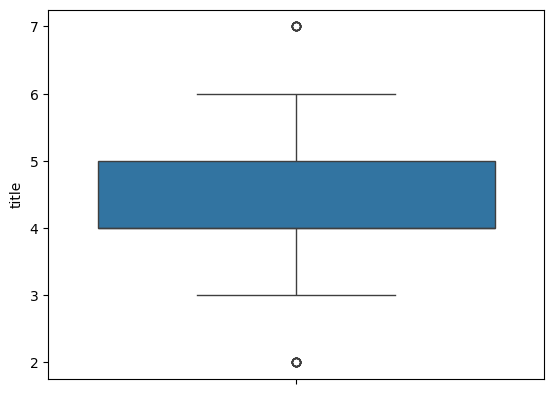

In [20]:
sns.boxplot(df['title'].str.split(" ").str.len())

As we can see that maximum number of words in the title is 7, we can set the sequence length to be the max words in the longest sentence.

In [21]:
max_sentence_len = df['title'].str.split(" ").str.len().max()
total_classes = df.category.nunique()

print(f"Maximum sequence length: {max_sentence_len}")
print(f"Total classes: {total_classes}")

Maximum sequence length: 7
Total classes: 5


# Splitting the data to train and test

In [36]:
np.random.seed(100)
train_X, test_X, train_Y, test_Y = train_test_split(df['title'],
                                                    df['category'],
                                                    test_size=0.2,
                                                    random_state=100)
train_X = train_X.reset_index(drop=True)
test_X = test_X.reset_index(drop=True)
train_Y = train_Y.reset_index(drop=True)
train_Y = train_Y.reset_index(drop=True)

In [37]:
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((1780,), (1780,), (445,), (445,))

In [38]:
train_X[:5]

0        moya fights back indian title
1    radcliffe enjoys winning comeback
2         edwards tips idowu euro gold
3         podcasts mark rise diy radio
4     bnp leader nick griffin arrested
Name: title, dtype: object

In [39]:
train_Y[:5]

0       sport
1       sport
2       sport
3        tech
4    politics
Name: category, dtype: object

In [40]:
train_Y.shape

(1780,)

# One hot Encode the labels

In [41]:
train_Y = pd.get_dummies(train_Y).values
test_Y = pd.get_dummies(test_Y).values

In [42]:
train_Y.shape

(1780, 5)

In [43]:
train_Y[:5]

array([[False, False, False,  True, False],
       [False, False, False,  True, False],
       [False, False, False,  True, False],
       [False, False, False, False,  True],
       [False, False,  True, False, False]])

In [44]:
validation = test_Y.argmax(axis=1)

In [45]:
validation[:5]

array([4, 4, 3, 0, 3])

# Tokenize the input text and pad them

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def tokenize_and_pad(inp_text, max_len, tok):

    text_seq = tok.texts_to_sequences(inp_text)
    text_seq = pad_sequences(text_seq, maxlen=max_len, padding='post')

    return text_seq

text_tok = Tokenizer()
text_tok.fit_on_texts(train_X)
train_text_X = tokenize_and_pad(inp_text=train_X, max_len=max_sentence_len, tok=text_tok)
test_text_X = tokenize_and_pad(inp_text=test_X, max_len=max_sentence_len, tok=text_tok)
vocab_size = len(text_tok.word_index)+1

print("Overall text vocab size", vocab_size)

Overall text vocab size 3360


# Choose the latent dimension and embedding dimension

<b>Latent dimension</b>: Dimension of the weight matrix U, V, W
<br>
<b>Embedding dimension</b>: Dimension of the word embeddings at the embedding layer

In [47]:
latent_dim=50
embedding_dim=100

# Define the RNN model architecture

* The embedding layer with 100 dimension
* A single Vanilla RNN unit with 50 dimensions
* A final output layer with 5 units(5 classes) with the softmax activation function

In [49]:
seed=56
tf.random.set_seed(seed)
np.random.seed(seed)

# The Model 
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, trainable=True))
model.add(SimpleRNN(latent_dim, recurrent_dropout=0.2, return_sequences=False, activation='tanh'))
model.add(Dense(total_classes, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Model training

* Optimizer: Adam
* Loss: Categorical cross-entrophy since it is a multiclass classification probem
* Early stopping: Used to stop training if validation accuracy does not improve while training to avoid overfitting

In [50]:
tf.random.set_seed(seed)
np.random.seed(seed)

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

early_stopping = EarlyStopping(monitor='val_acc',
                               mode='max',
                               verbose=1,
                               patience=5)

model.fit(x=train_text_X, 
          y=train_Y,
          validation_data=(test_text_X, test_Y),
          batch_size=64,
          epochs=10,
          callbacks=[early_stopping])

Epoch 1/10


2024-07-22 07:59:14.932403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - acc: 0.2714 - loss: 1.5895 - val_acc: 0.2652 - val_loss: 1.5711
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - acc: 0.5328 - loss: 1.3656 - val_acc: 0.4989 - val_loss: 1.3537
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - acc: 0.8197 - loss: 0.7926 - val_acc: 0.6742 - val_loss: 0.9365
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - acc: 0.9295 - loss: 0.3256 - val_acc: 0.7056 - val_loss: 0.9078
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - acc: 0.9687 - loss: 0.1578 - val_acc: 0.7191 - val_loss: 0.9881
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - acc: 0.9915 - loss: 0.0772 - val_acc: 0.7124 - val_loss: 1.0882
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - acc: 0.9876 - loss: 0.0647 - val_acc: 0.6899 - val_loss: 1.1671
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - acc: 0.9949 - loss: 0.0368 - val_acc: 0.6899 - val_loss: 1.2050
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - acc: 0.9961 - loss: 0.

# Save the trained model

In [66]:
model.save("../dataset/model_artifacts/BCC_classifier.keras")

# Load the saved model

In [67]:
model = tf.keras.models.load_model("../dataset/model_artifacts/BCC_classifier.keras")

# Make predictions on the test dataset

In [68]:
prediction = model.predict(test_text_X)
prediction = prediction.argmax(axis=1)
print(f"Accuracy: {accuracy_score(prediction, validation)}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy: 0.6943820224719102


# Confusion matrix of the prediction and actual

Text(0.5, 1.0, 'Confusion Matrix')

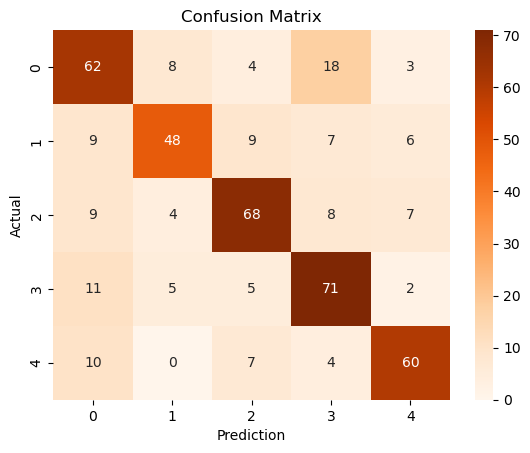

In [69]:
cm = confusion_matrix(validation, prediction)

# print("")
# plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, cmap='Oranges')
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Conclusions

Things to keep in mind
* RNN takes the current input at time <b>t</b> as well as the hidden state from the previous time stamp <b>t-1</b>.
* There are 3 weight Matrices <b>W, U, V</b> from the input, hidden state and output and <b>W, U, V, W', U', V'</b> respectively interms of bi-directional RNN
* BiDirectional RNN process information from left to right and also from riogh
* The same RNN unit is reused for all the input so weights are shared across all time steps.
* The gradients are calculated over time which is called the BPPT.
* Backpropagation through time: what it does and how to do it- https://axon.cs.byu.edu/Dan/678/papers/Recurrent/Werbos.pdf
